# Multiple Linear Regression Assignment

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Step 1: lets now load data and understand the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
GeelyAuto = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Lets check the head of the dataset
GeelyAuto.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Lets check the data description and info
GeelyAuto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
GeelyAuto.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2: Data Preparation
You can see that your dataset has many columns with categorical data.

But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

In [7]:
GeelyAuto.set_index('car_ID',inplace=True)
GeelyAuto.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Lets now split carname and consider only car company name
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: x.split(' ')[0])

In [9]:
GeelyAuto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
# We see some names from GeelyAuto CarName column having redudant or some name issues lets fix that
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'volkswagen' if x=='vokswagen' else x)
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'mazda' if x=='maxda' else x)
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'nissan' if x=='Nissan' else x)
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'porsche' if x=='porcshce' else x)
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'toyota' if x=='toyouta' else x)
GeelyAuto['CarName']=GeelyAuto['CarName'].apply(lambda x: 'volkswagen' if x=='vw' else x)

In [11]:
GeelyAuto['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#Now lets check for other columns
GeelyAuto.nunique()

symboling             6
CarName              22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [13]:
#Now to change categorical data for this lets check unique data
GeelyAuto.nunique()

symboling             6
CarName              22
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [14]:
#Now lets set all categorycall data with 2 possiblities with 1 or 0
#array(['gas', 'diesel'], dtype=object) for fueltype
def decodeFuelType(fuelType):
    if fuelType=='gas':
        return 1
    else:
        return 0
GeelyAuto['fueltype']=GeelyAuto['fueltype'].apply(decodeFuelType)

In [15]:
GeelyAuto['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [16]:
# array(['std', 'turbo'], dtype=object) for aspiration
def decodeType(x):
    if x=='std':
        return 1
    else:
        return 0
GeelyAuto['aspiration']=GeelyAuto['aspiration'].apply(decodeType)

# array(['two', 'four'], dtype=object) for doornumber
def decodeType(x):
    if x=='two':
        return 1
    else:
        return 0
GeelyAuto['doornumber']=GeelyAuto['doornumber'].apply(decodeType)
# array(['front', 'rear'], dtype=object) for enginelocation
def decodeType(x):
    if x=='front':
        return 1
    else:
        return 0
GeelyAuto['enginelocation']=GeelyAuto['enginelocation'].apply(decodeType)


# Dummy Variables

In [17]:
#now to create some dummy variables for CarName category
CarName=pd.get_dummies(GeelyAuto['CarName'],drop_first = True,prefix='CarName',prefix_sep='_')
#CarName.drop('Nissan',inplace=True,axis=1)
CarName.head()


,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,...,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
GeelyAuto = pd.concat([GeelyAuto,CarName],axis=1)

In [19]:
#now to create some dummy variables for carbody category
carbody=pd.get_dummies(GeelyAuto['carbody'],drop_first = True,prefix='carbody',prefix_sep='_')
#carbody.head()
GeelyAuto = pd.concat([GeelyAuto,carbody],axis=1)

#now to create some dummy variables for drivewheel category
drivewheel=pd.get_dummies(GeelyAuto['drivewheel'],drop_first = True,prefix='drivewheel',prefix_sep='_')
#drivewheel.head()
GeelyAuto = pd.concat([GeelyAuto,drivewheel],axis=1)
#now to create some dummy variables for enginetype category
enginetype=pd.get_dummies(GeelyAuto['enginetype'],drop_first = True,prefix='enginetype',prefix_sep='_')
#enginetype.head()
GeelyAuto = pd.concat([GeelyAuto,enginetype],axis=1)

#now to create some dummy variables for cylindernumber category
cylindernumber=pd.get_dummies(GeelyAuto['cylindernumber'],drop_first = True,prefix='cylindernumber',prefix_sep='_')
#cylindernumber.head()
GeelyAuto = pd.concat([GeelyAuto,cylindernumber],axis=1)

#now to create some dummy variables for fuelsystem category
fuelsystem=pd.get_dummies(GeelyAuto['fuelsystem'],drop_first = True,prefix='fuelsystem',prefix_sep='_')
#fuelsystem.head()
GeelyAuto = pd.concat([GeelyAuto,fuelsystem],axis=1)

In [20]:
GeelyAuto.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.819512,0.439024,0.985366,98.756585,174.049268,65.907805,53.724878,2555.565854,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.297446,0.385535,0.497483,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
GeelyAuto.drop(['CarName','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'],axis=1,inplace=True)

In [22]:
GeelyAuto.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,3,1,1,1,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,1,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
5,2,1,1,0,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [23]:
GeelyAuto.nunique()

symboling                  6
fueltype                   2
aspiration                 2
doornumber                 2
enginelocation             2
wheelbase                 53
carlength                 75
carwidth                  44
carheight                 49
curbweight               171
enginesize                44
boreratio                 38
stroke                    37
compressionratio          32
horsepower                59
peakrpm                   23
citympg                   29
highwaympg                30
price                    189
CarName_audi               2
CarName_bmw                2
CarName_buick              2
CarName_chevrolet          2
CarName_dodge              2
CarName_honda              2
CarName_isuzu              2
CarName_jaguar             2
CarName_mazda              2
CarName_mercury            2
CarName_mitsubishi         2
                        ... 
CarName_saab               2
CarName_subaru             2
CarName_toyota             2
CarName_volksw

# Step 3: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [24]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(GeelyAuto, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features
As you saw in the in our leactures of Simple Linear Regression, scaling doesn't impact our model. Here we can see that except for curbweight and peek rpm, all the columns have small integer values or categorical data. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Option chosen will use MinMax scaling.

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()

In [27]:
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [28]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

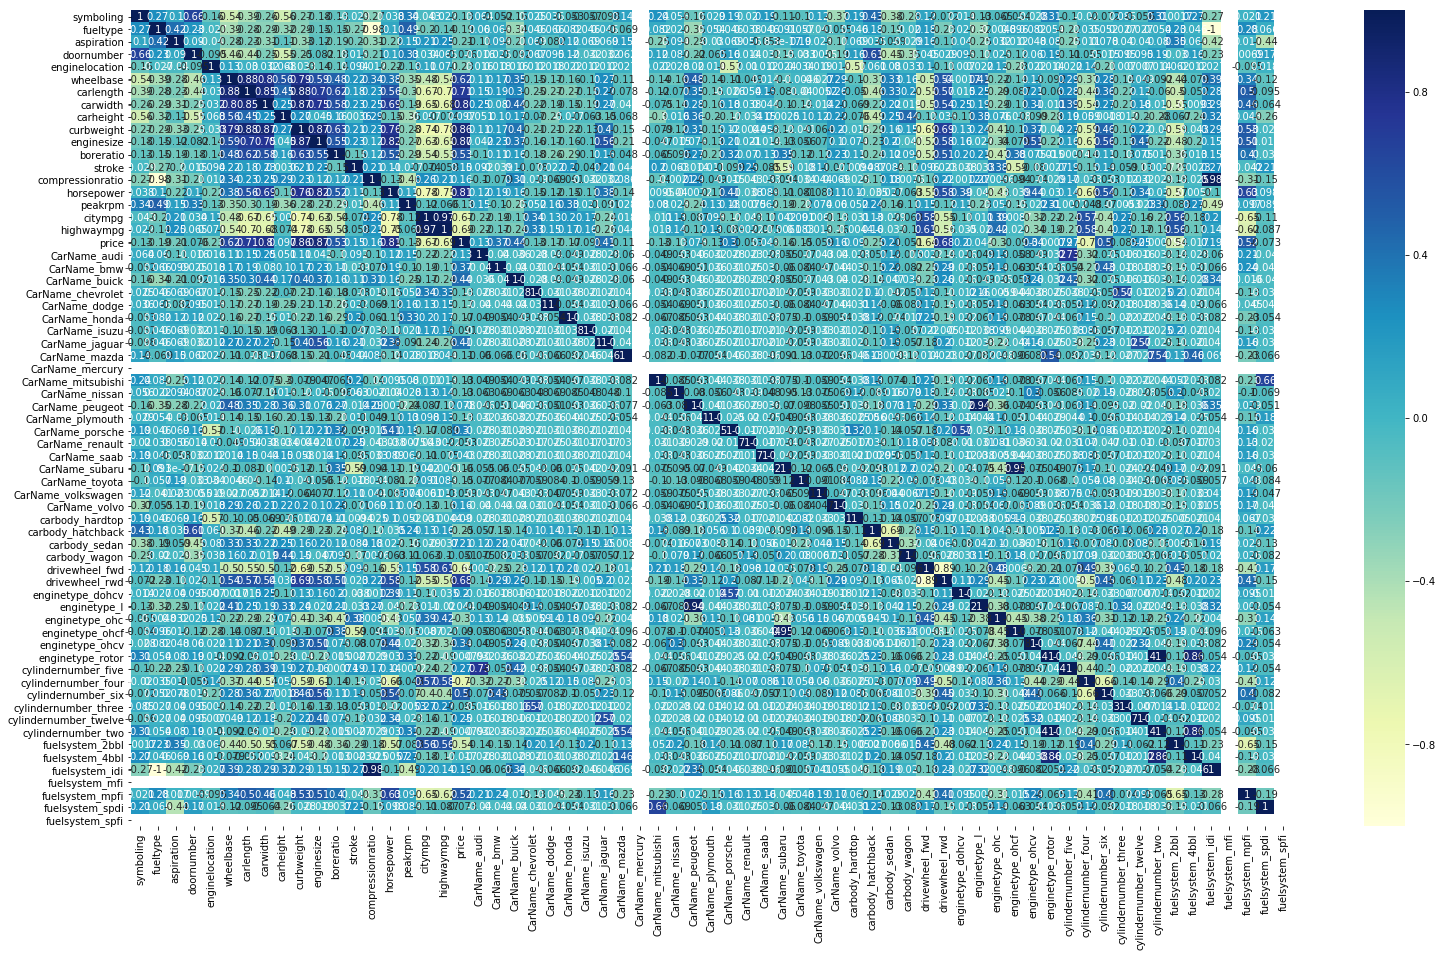

In [30]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

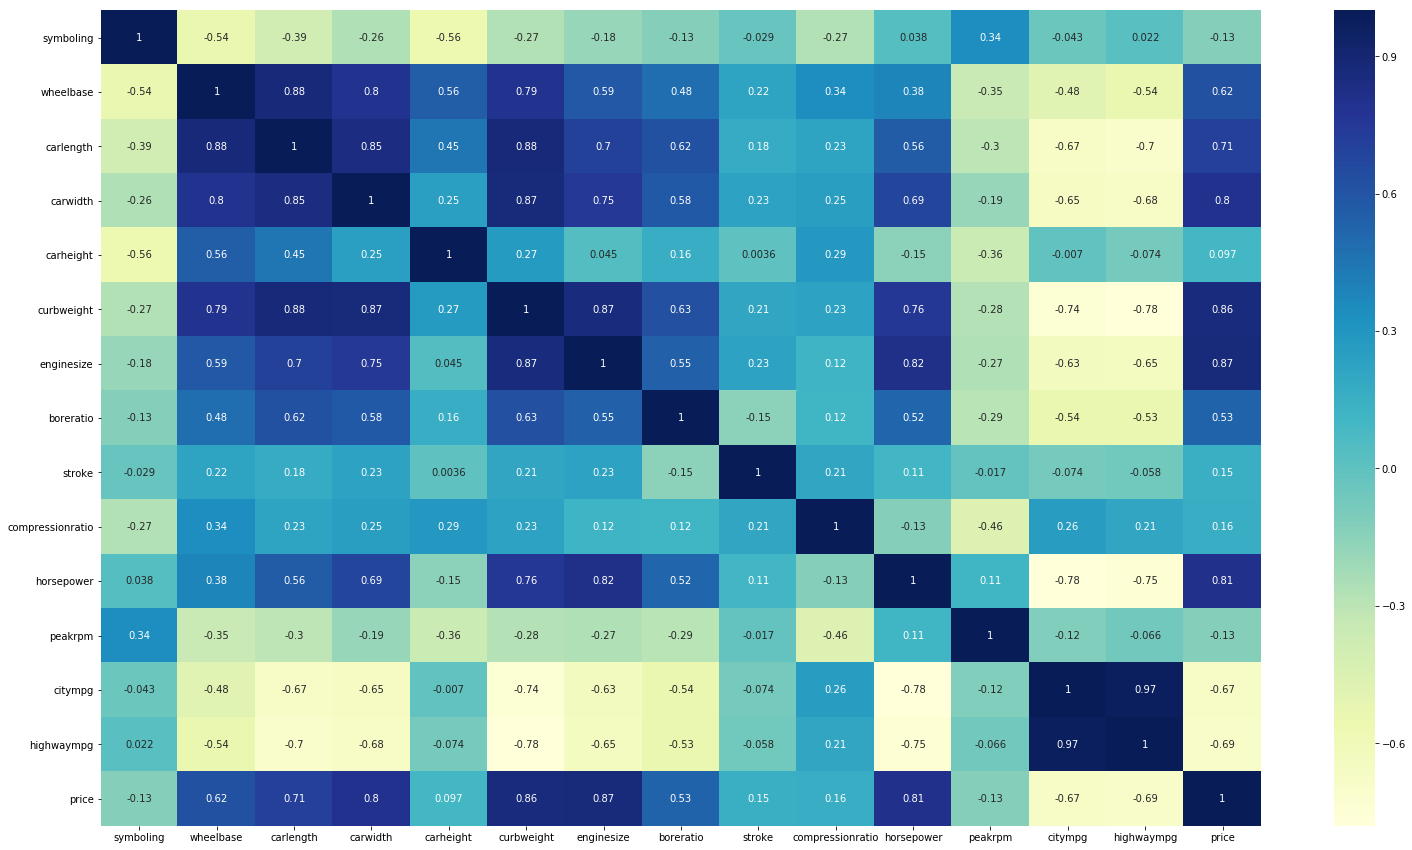

In [31]:
# With so many variables in our data set its very difficult to infer anything.Lets infer few main features
col = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
plt.figure(figsize = (26, 15))
sns.heatmap(df_train[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [32]:
df_train.corr()['price']

symboling               -0.129859
fueltype                -0.191150
aspiration              -0.206540
doornumber              -0.075936
enginelocation          -0.226217
wheelbase                0.622591
carlength                0.713749
carwidth                 0.799380
carheight                0.096631
curbweight               0.861860
enginesize               0.867915
boreratio                0.533591
stroke                   0.152820
compressionratio         0.160847
horsepower               0.806183
peakrpm                 -0.127431
citympg                 -0.674290
highwaympg              -0.688389
price                    1.000000
CarName_audi             0.131449
CarName_bmw              0.371790
CarName_buick            0.437268
CarName_chevrolet       -0.132643
CarName_dodge           -0.165673
CarName_honda           -0.172485
CarName_isuzu           -0.091266
CarName_jaguar           0.405372
CarName_mazda           -0.105680
CarName_mercury               NaN
CarName_mitsub

In [33]:
#We see some relation between columns and Price so to narrow down the correlation we used the below Mask
mask = df_train.corr()['price']>=0.3
df_train.corr()[mask]['price']

wheelbase             0.622591
carlength             0.713749
carwidth              0.799380
curbweight            0.861860
enginesize            0.867915
boreratio             0.533591
horsepower            0.806183
price                 1.000000
CarName_bmw           0.371790
CarName_buick         0.437268
CarName_jaguar        0.405372
CarName_porsche       0.302801
drivewheel_rwd        0.677169
enginetype_ohcv       0.339468
cylindernumber_six    0.500613
fuelsystem_mpfi       0.519993
Name: price, dtype: float64

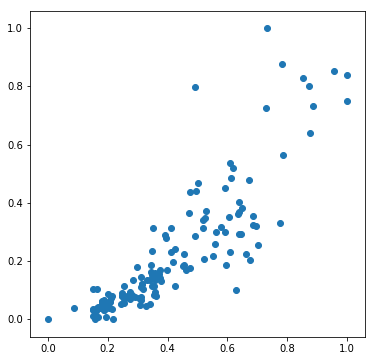

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.curbweight, df_train.price)
plt.show()

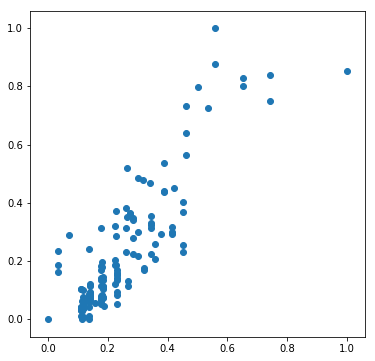

In [35]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

## if we see the top few scatter plot we see some linear relation with the price now lets go further and analyse some data.

#### Dividing into X and Y sets for the model building

In [36]:
y_train = df_train.pop('price')
X_train = df_train

# Step 4: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [37]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight']])

# Create a first fitted model with curbweight and price
lr = sm.OLS(y_train, X_train_lm).fit()

In [38]:
# Now lets check the parameters obtained

lr.params

const        -0.139568
curbweight    0.879863
dtype: float64

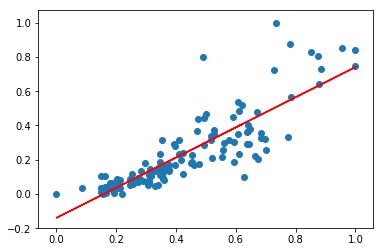

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.139568 + 0.879863*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained considering curbweight
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           2.06e-43
Time:                        07:35:48   Log-Likelihood:                 114.04
No. Observations:                 143   AIC:                            -224.1
Df Residuals:                     141   BIC:                            -218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.020     -6.974      0.0

### Add another variable

In [41]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['curbweight','enginesize']])

# Create a first fitted model with curbweight and price
lr = sm.OLS(y_train, X_train_lm).fit()

In [42]:
lr.params

const        -0.128113
curbweight    0.450496
enginesize    0.678162
dtype: float64

In [43]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           5.31e-50
Time:                        07:35:48   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

#### We see some increase on the adjusted R square so this is a value addition.
##### Let move forward to use RFE for feature selection and see if we can create a better model

In [44]:
#Build a linear model considering all the variables to analyse the impact

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                    2.306669e-02
symboling               -9.879522e-03
fueltype                -1.260443e-01
aspiration              -8.113676e-02
doornumber              -1.271982e-02
enginelocation          -1.903334e-01
wheelbase                2.367996e-01
carlength               -1.752292e-01
carwidth                 2.597715e-01
carheight               -1.762854e-01
curbweight               3.291759e-01
enginesize               2.010441e+00
boreratio               -6.214539e-01
stroke                  -1.812934e-01
compressionratio        -3.611938e-01
horsepower              -2.005293e-01
peakrpm                  1.878108e-01
citympg                 -5.156732e-02
highwaympg               1.273365e-01
CarName_audi             6.967675e-02
CarName_bmw              3.396067e-01
CarName_buick            4.930883e-02
CarName_chevrolet       -5.223870e-02
CarName_dodge           -1.089892e-01
CarName_honda           -6.885945e-02
CarName_isuzu            2.295335e-03
CarName_jagu

In [45]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.40e-49
Time:                        07:35:48   Log-Likelihood:                 280.02
No. Observations:                 143   AIC:                            -444.0
Df Residuals:                      85   BIC:                            -272.2
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

###### As the warnings suggest there is a strong multicolinearity problem.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                 Features         VIF
54   cylindernumber_three         inf
59         fuelsystem_idi         inf
35         CarName_subaru         inf
1                fueltype         inf
30        CarName_peugeot         inf
46           enginetype_l         inf
48        enginetype_ohcf         inf
56     cylindernumber_two         inf
50       enginetype_rotor         inf
4          enginelocation         inf
52    cylindernumber_four  470.310000
10             enginesize  372.550000
13       compressionratio  298.700000
11              boreratio   89.540000
53     cylindernumber_six   89.140000
14             horsepower   86.860000
51    cylindernumber_five   86.020000
61        fuelsystem_mpfi   68.000000
16                citympg   59.320000
9              curbweight   55.090000
57        fuelsystem_2bbl   51.750000
17             highwaympg   49.470000
41          carbody_sedan   40.420000
36         CarName_toyota   34.580000
40      carbody_hatchback   32.310000
47         e

### Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values some with 'inf'. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `fueltype` has high VIF inf and a high p-value (`0.206`) as well. Hence, this variable isn't of much use and should be dropped.

In [48]:
X = X_train.drop('fueltype', 1,)

In [49]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.40e-49
Time:                        07:35:48   Log-Likelihood:                 280.02
No. Observations:                 143   AIC:                            -444.0
Df Residuals:                      85   BIC:                            -272.2
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

In [50]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
49,enginetype_rotor,inf
45,enginetype_l,inf
29,CarName_peugeot,inf
53,cylindernumber_three,inf
55,cylindernumber_two,inf
3,enginelocation,2631.800000
51,cylindernumber_four,470.310000
34,CarName_subaru,447.870000
9,enginesize,372.550000
58,fuelsystem_idi,317.620000


In [51]:
# Calculate the VIFs again for the new model

X1 = X.drop('enginetype_rotor', 1,)
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
52,cylindernumber_three,inf
29,CarName_peugeot,inf
45,enginetype_l,inf
3,enginelocation,2631.800000
50,cylindernumber_four,470.310000
34,CarName_subaru,447.870000
9,enginesize,372.550000
57,fuelsystem_idi,317.620000
12,compressionratio,298.700000
47,enginetype_ohcf,287.690000


In [52]:
# Calculate the VIFs again for the new model

X2 = X1.drop('cylindernumber_three', 1,)
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginelocation,2631.80
50,cylindernumber_four,470.31
34,CarName_subaru,447.87
9,enginesize,372.55
56,fuelsystem_idi,317.62
12,compressionratio,298.70
47,enginetype_ohcf,287.69
45,enginetype_l,174.12
29,CarName_peugeot,121.59
53,cylindernumber_two,105.25


In [53]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.40e-49
Time:                        07:35:50   Log-Likelihood:                 280.02
No. Observations:                 143   AIC:                            -444.0
Df Residuals:                      85   BIC:                            -272.2
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.07

## After droping two features we see VIF to be reduced and p value change as well, But the manual feature list selection will not not help due to the number of features lets move to RFE

In [96]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(GeelyAuto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [98]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,
123,0.6,1,1,0,1,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
126,1.0,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
167,0.6,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
2,1.0,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
200,0.2,1,0,0,1,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [99]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.909091,0.818182,0.440559,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [59]:
# Running RFE with the output number of the variable as 10
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [60]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('fueltype', False, 23),
 ('aspiration', False, 14),
 ('doornumber', False, 51),
 ('enginelocation', True, 1),
 ('wheelbase', False, 15),
 ('carlength', False, 20),
 ('carwidth', True, 1),
 ('carheight', False, 16),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 46),
 ('peakrpm', False, 19),
 ('citympg', False, 38),
 ('highwaympg', False, 27),
 ('CarName_audi', False, 37),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 36),
 ('CarName_chevrolet', False, 22),
 ('CarName_dodge', False, 18),
 ('CarName_honda', False, 21),
 ('CarName_isuzu', False, 53),
 ('CarName_jaguar', False, 32),
 ('CarName_mazda', False, 44),
 ('CarName_mercury', False, 48),
 ('CarName_mitsubishi', False, 13),
 ('CarName_nissan', False, 43),
 ('CarName_peugeot', False, 6),
 ('CarName_plymouth', False, 17),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 47),
 ('Car

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'CarName_bmw', 'CarName_porsche', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_renault', 'CarName_saab', 'CarName_subaru',
       'CarName_toyota', 'CarName_volkswagen', 'CarName_volvo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',

In [63]:
x_train_rfe=X_train[col]

In [64]:
import statsmodels.api as sm

In [65]:
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           1.21e-64
Time:                        07:35:52   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

## Calculate VIF1

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()
x = x_train_rfe
vif['features']=x.columns
vif['vif']=[variance_inflation_factor(x.values, i ) for i in range(x.shape[1])]
vif

,features,vif
0,const,230.922520
1,enginelocation,1.663007
2,carwidth,4.920153
3,curbweight,9.263420
4,enginesize,7.225349
5,boreratio,1.852666
6,CarName_bmw,1.134883
7,CarName_porsche,1.818873
8,cylindernumber_three,1.054182
9,cylindernumber_twelve,1.494303


In [68]:
# Running RFE with the output number of the variable as 12
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,12)
rfe = rfe.fit(X_train,y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 39),
 ('fueltype', False, 21),
 ('aspiration', False, 12),
 ('doornumber', False, 49),
 ('enginelocation', True, 1),
 ('wheelbase', False, 13),
 ('carlength', False, 18),
 ('carwidth', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 23),
 ('horsepower', False, 44),
 ('peakrpm', False, 17),
 ('citympg', False, 36),
 ('highwaympg', False, 25),
 ('CarName_audi', False, 35),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 34),
 ('CarName_chevrolet', False, 20),
 ('CarName_dodge', False, 16),
 ('CarName_honda', False, 19),
 ('CarName_isuzu', False, 51),
 ('CarName_jaguar', False, 30),
 ('CarName_mazda', False, 42),
 ('CarName_mercury', False, 46),
 ('CarName_mitsubishi', False, 11),
 ('CarName_nissan', False, 41),
 ('CarName_peugeot', False, 4),
 ('CarName_plymouth', False, 15),
 ('CarName_porsche', True, 1),
 ('CarName_renault', False, 45),
 ('CarN

In [70]:
col = X_train.columns[rfe.support_]
print(col)
x_train_rfe=X_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())
vif = pd.DataFrame()
x = x_train_rfe
vif['features']=x.columns
vif['vif']=[variance_inflation_factor(x.values, i ) for i in range(x.shape[1])]
print(vif)

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'CarName_bmw', 'CarName_porsche', 'enginetype_rotor',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           6.86e-65
Time:                        07:35:53   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust  

In [71]:
# Running RFE with the output number of the variable as 8
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,6)
rfe = rfe.fit(X_train,y_train)

In [72]:
print(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
col = X_train.columns[rfe.support_]
print(col)
x_train_rfe=X_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())
vif = pd.DataFrame()
x = x_train_rfe
vif['features']=x.columns
vif['vif']=[variance_inflation_factor(x.values, i ) for i in range(x.shape[1])]
print(vif)

[('symboling', False, 45), ('fueltype', False, 27), ('aspiration', False, 18), ('doornumber', False, 55), ('enginelocation', True, 1), ('wheelbase', False, 19), ('carlength', False, 24), ('carwidth', True, 1), ('carheight', False, 20), ('curbweight', True, 1), ('enginesize', True, 1), ('boreratio', False, 4), ('stroke', False, 6), ('compressionratio', False, 29), ('horsepower', False, 50), ('peakrpm', False, 23), ('citympg', False, 42), ('highwaympg', False, 31), ('CarName_audi', False, 41), ('CarName_bmw', True, 1), ('CarName_buick', False, 40), ('CarName_chevrolet', False, 26), ('CarName_dodge', False, 22), ('CarName_honda', False, 25), ('CarName_isuzu', False, 57), ('CarName_jaguar', False, 36), ('CarName_mazda', False, 48), ('CarName_mercury', False, 52), ('CarName_mitsubishi', False, 17), ('CarName_nissan', False, 47), ('CarName_peugeot', False, 10), ('CarName_plymouth', False, 21), ('CarName_porsche', False, 3), ('CarName_renault', False, 51), ('CarName_saab', False, 13), ('CarNa

# Step 5: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
# Build a fourth fitted model
x_train_rfe=X_train[col]
X_train_lm = sm.add_constant(x_train_rfe)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
y_train_price = lr_4.predict(X_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Errors')

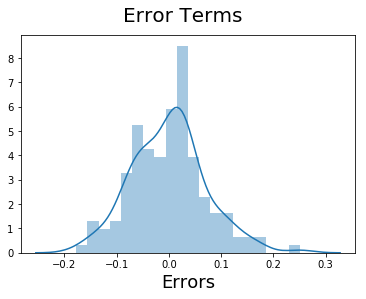

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Step 6: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.


### Applying the scaling on the test sets

In [101]:
#x_train_rfe=X_train[col]
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(GeelyAuto, train_size = 0.7, test_size = 0.3, random_state = 100)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
col = ['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'CarName_bmw',
       'cylindernumber_three']
y_test = df_test.pop('price')
X_test = df_test[col]
y_train = df_train.pop('price')
X_train = df_train[col]

In [105]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)
X_train_final = sm.add_constant(X_train)

In [106]:
lr_2 = sm.OLS(y_train, X_train_final).fit()

In [110]:
lr_2.params

const                   0.290687
enginelocation         -0.482417
carwidth                0.386564
curbweight              0.267873
enginesize              0.447988
CarName_bmw             0.249720
cylindernumber_three    0.192642
dtype: float64

In [111]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     186.8
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           4.11e-63
Time:                        10:30:01   Log-Likelihood:                 175.94
No. Observations:                 143   AIC:                            -337.9
Df Residuals:                     136   BIC:                            -317.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2907 

In [108]:
# Making predictions using the fourth model

y_pred_train_final = lr_2.predict(X_test_final)
y_pred_test_final = lr_2.predict(X_test_final)

In [113]:
# Check the parameters obtained

lr_2.params

const                   0.290687
enginelocation         -0.482417
carwidth                0.386564
curbweight              0.267873
enginesize              0.447988
CarName_bmw             0.249720
cylindernumber_three    0.192642
dtype: float64

### We can see that the equation of our best fitted line is:

price=-0.4824×enginelocation+0.3865×carwidth+0.2678×curbweight+0.4479×enginesize+0.2497×CarName_bmw+0.1926×cylindernumber_three+0.290687